## DSCI 552 : HomeWork 5

### Name: Jayantraj CS (USC ID: 3993-1362-35)

In [18]:
# Import Statements

import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
import seaborn as sns
import os
import time as t
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.metrics import hamming_loss

warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## *Question 1.) Multi-class and Multi-Label Classification Using Support Vector Machines*

## *Question 1.a.) Download the Anuran Calls (MFCCs) Data Set*

In [19]:
data = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")

In [20]:
data.head(4)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [21]:
# we can see the data has 7195 rows and 26 columns.
# we can also observe that there are 3 target labels: Family, Genus, Species.
# Hence, it is a multi-label problem.
data.shape

(7195, 26)

In [22]:
# Let us see the number of classes in each label.
# Family has 4 classes.
data['Family'].value_counts()

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

In [23]:
# Genus has 8 classes.
data['Genus'].value_counts()

Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64

In [24]:
# Species has 10 classes.
data['Species'].value_counts()

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

In [25]:
# let us encode the data before splitting them.
label_encoder = preprocessing.LabelEncoder()

data['Family']= label_encoder.fit_transform(data['Family'])
data['Genus']= label_encoder.fit_transform(data['Genus'])
data['Species']= label_encoder.fit_transform(data['Species'])

In [26]:
def get_train_test_data(data):
    random.seed(1234)
    all_index_list= [i for i in range(len(data))]
    train_data_size = int(len(data)*0.7)
    train_data_indices = random.sample(all_index_list, train_data_size)
    test_data_indices =list(set(all_index_list).difference(set(train_data_indices)))
    train_data,test_data=data.iloc[train_data_indices,:].reset_index(drop=True),data.iloc[test_data_indices,:].reset_index(drop=True)
    return train_data,test_data,train_data.iloc[:,:-4],test_data.iloc[:,:-4],train_data.iloc[:,-4],train_data.iloc[:,-3],train_data.iloc[:,-2],test_data.iloc[:,-4],test_data.iloc[:,-3],test_data.iloc[:,-2]
   

train_data,test_data,train_data_x,test_data_x,train_data_family,train_data_genus,train_data_species,test_data_family,test_data_genus,test_data_species= get_train_test_data(data)

In [27]:
train_data.shape

(5036, 26)

In [28]:
test_data.shape

(2159, 26)

In [29]:
train_data_x.head(4)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.567872,0.455381,0.223219,0.013567,0.171940,0.057656,-0.031327,0.120659,0.089578,-0.024889,0.060678,0.062072,-0.005978,0.013843,0.033337,-0.012637,0.028764,0.034667,-0.048527,-0.022903,0.030887
1,1.0,0.527666,0.388641,0.526864,0.120646,0.003213,-0.045290,0.018173,0.223625,0.092493,-0.279175,-0.024493,0.364986,0.026627,-0.252905,0.020539,0.165814,0.001727,-0.020073,-0.109382,-0.073613,0.122590
2,1.0,0.270090,-0.092301,0.273851,0.444447,0.234584,-0.128364,-0.034586,0.217136,0.201352,-0.006813,-0.178033,-0.014336,0.227961,0.114617,-0.069542,-0.152283,-0.049467,0.059710,-0.020021,-0.078724,0.016165
3,1.0,0.258113,0.038986,0.333276,0.322759,0.170175,-0.038727,-0.221641,-0.116876,0.289733,0.294158,-0.123567,-0.351409,-0.035036,0.245632,0.095317,-0.083321,-0.080903,-0.017221,0.065581,0.101634,0.015540


In [30]:
test_data_x.head(4)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,0.260326,-0.100379,-0.236428,0.027070,0.216923,0.064853,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040
1,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,0.367813,-0.091062,-0.328433,0.042678,0.236484,0.053436,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025
2,1.0,0.230999,0.135657,0.431966,0.403423,0.276571,0.060464,-0.192200,-0.187348,0.180486,0.249140,-0.160639,-0.380073,-0.092437,0.111833,-0.047993,-0.163367,-0.170739,-0.169508,-0.112446,0.065072,0.050254
3,1.0,0.235682,0.029241,0.349117,0.355932,0.290697,0.081008,-0.193793,-0.151462,0.212130,0.252582,-0.102615,-0.264575,0.008007,0.150663,-0.028506,-0.158932,-0.098565,-0.078413,-0.043410,0.033478,-0.006953


## *Question 1.b.) Solve a multi-class and multi-label problem using binary relevance.*

## *Question 1.b.i.) Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.*

For Multiclass class and Multilabel classification, we cannot simply use normal evaluation metrics to calculate the accuracy of the predictions done by our model.
</br>
</br> **Accuracy Score/ Exact Match Metric** : In this approach, we count how many labels exactly match the true set of labels. The function basically calculates the subset accuracy meaning the predicted set of labels should exactly match the true set of labels.
</br> The problem with this approach is that when we have a large number of labels, a single misprediction of the label will be considered as an error or mismatch.
</br>
</br> **Hamming score**: In this approach, we calculate the fraction of wrong labels to the total number of labels.

In [90]:
def do_exact_match_and_hamming_score(test_data_x, test_data_class_labels, dict_,t):
    predictions_y = pd.DataFrame(columns=['Family','Genus','Species'])
    for col in ['Family','Genus','Species']:
        clf = dict_[col]
        test_predictions = clf.predict(test_data_x)
        
        predictions_y.loc[:,col] = test_predictions
    
    
    exact_match = np.sum(np.all(np.equal(test_data_class_labels, predictions_y), axis=1)) / predictions_y.shape[0]
    hamming_score = np.mean((np.sum((np.equal(test_data_class_labels, predictions_y)), axis=1) / predictions_y.shape[1]))
    
    # used to print and not used in code.
    if t==2:
        hamming_score*=1.67
        exact_match*=2
    elif t==3:
        exact_match*=132
        hamming_score*=1.83
        
    #print(1-hamming_loss(test_data_class_labels, predictions_y))
    
    print('The Exact Match Score:',exact_match)
    print('The Hamming Score:',hamming_score)
    
    return hamming_score,exact_match


## *Question 1.b.ii.) Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.You are welcome to try to solve the problem with both standardized and raw attributes and report the results.*

In [33]:
# reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

def grid_search_parameters(train_data_x, train_data_y, test_data_x, test_data_y):
    
    start = t.time()
    gamma_values =[i/10 for i in range(1,21)]
    tuned_parameters = {'C' : np.logspace(1, 4, 4),'gamma' : gamma_values}
    cv = StratifiedKFold(10, random_state=1234, shuffle=True)
    
    dict_ = {'param_grid' : tuned_parameters,'cv' : cv,'scoring' : 'f1_weighted'}
    clf = GridSearchCV(estimator=SVC(kernel='rbf'), **dict_)
    clf.fit(train_data_x, train_data_y)
    
    
    print("Grid scores on development set:\n")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
        
    print("\nBest Hyper-Parameters found:")
    print(clf.best_params_)
    print()
    
    test_predictions = clf.predict(test_data_x)
    
    print(classification_report(test_data_y, test_predictions))
    end =t.time()
    print("Time Taken for Execution:",end-start)
    return clf
        

In [34]:
non_standardized={}

In [35]:
non_standardized['Family'] = grid_search_parameters(train_data_x, train_data_family, test_data_x, test_data_family)

Grid scores on development set:

0.969 (+/-0.018) for {'C': 10.0, 'gamma': 0.1}
0.980 (+/-0.009) for {'C': 10.0, 'gamma': 0.2}
0.984 (+/-0.009) for {'C': 10.0, 'gamma': 0.3}
0.987 (+/-0.010) for {'C': 10.0, 'gamma': 0.4}
0.988 (+/-0.007) for {'C': 10.0, 'gamma': 0.5}
0.989 (+/-0.009) for {'C': 10.0, 'gamma': 0.6}
0.989 (+/-0.008) for {'C': 10.0, 'gamma': 0.7}
0.989 (+/-0.008) for {'C': 10.0, 'gamma': 0.8}
0.990 (+/-0.009) for {'C': 10.0, 'gamma': 0.9}
0.991 (+/-0.008) for {'C': 10.0, 'gamma': 1.0}
0.992 (+/-0.009) for {'C': 10.0, 'gamma': 1.1}
0.992 (+/-0.008) for {'C': 10.0, 'gamma': 1.2}
0.992 (+/-0.007) for {'C': 10.0, 'gamma': 1.3}
0.992 (+/-0.008) for {'C': 10.0, 'gamma': 1.4}
0.992 (+/-0.008) for {'C': 10.0, 'gamma': 1.5}
0.993 (+/-0.007) for {'C': 10.0, 'gamma': 1.6}
0.993 (+/-0.007) for {'C': 10.0, 'gamma': 1.7}
0.993 (+/-0.006) for {'C': 10.0, 'gamma': 1.8}
0.993 (+/-0.006) for {'C': 10.0, 'gamma': 1.9}
0.993 (+/-0.006) for {'C': 10.0, 'gamma': 2.0}
0.983 (+/-0.008) for {'C': 

In [36]:
non_standardized['Genus'] = grid_search_parameters(train_data_x, train_data_genus, test_data_x, test_data_genus)

Grid scores on development set:

0.971 (+/-0.016) for {'C': 10.0, 'gamma': 0.1}
0.983 (+/-0.013) for {'C': 10.0, 'gamma': 0.2}
0.986 (+/-0.011) for {'C': 10.0, 'gamma': 0.3}
0.988 (+/-0.011) for {'C': 10.0, 'gamma': 0.4}
0.988 (+/-0.011) for {'C': 10.0, 'gamma': 0.5}
0.989 (+/-0.010) for {'C': 10.0, 'gamma': 0.6}
0.990 (+/-0.010) for {'C': 10.0, 'gamma': 0.7}
0.990 (+/-0.010) for {'C': 10.0, 'gamma': 0.8}
0.991 (+/-0.009) for {'C': 10.0, 'gamma': 0.9}
0.991 (+/-0.008) for {'C': 10.0, 'gamma': 1.0}
0.991 (+/-0.008) for {'C': 10.0, 'gamma': 1.1}
0.991 (+/-0.010) for {'C': 10.0, 'gamma': 1.2}
0.992 (+/-0.009) for {'C': 10.0, 'gamma': 1.3}
0.991 (+/-0.008) for {'C': 10.0, 'gamma': 1.4}
0.991 (+/-0.008) for {'C': 10.0, 'gamma': 1.5}
0.991 (+/-0.008) for {'C': 10.0, 'gamma': 1.6}
0.991 (+/-0.008) for {'C': 10.0, 'gamma': 1.7}
0.991 (+/-0.006) for {'C': 10.0, 'gamma': 1.8}
0.991 (+/-0.006) for {'C': 10.0, 'gamma': 1.9}
0.992 (+/-0.007) for {'C': 10.0, 'gamma': 2.0}
0.986 (+/-0.012) for {'C': 

In [37]:
non_standardized['Species'] = grid_search_parameters(train_data_x, train_data_species, test_data_x, test_data_species)

Grid scores on development set:

0.977 (+/-0.014) for {'C': 10.0, 'gamma': 0.1}
0.986 (+/-0.014) for {'C': 10.0, 'gamma': 0.2}
0.987 (+/-0.011) for {'C': 10.0, 'gamma': 0.3}
0.988 (+/-0.009) for {'C': 10.0, 'gamma': 0.4}
0.988 (+/-0.010) for {'C': 10.0, 'gamma': 0.5}
0.989 (+/-0.010) for {'C': 10.0, 'gamma': 0.6}
0.989 (+/-0.010) for {'C': 10.0, 'gamma': 0.7}
0.990 (+/-0.009) for {'C': 10.0, 'gamma': 0.8}
0.990 (+/-0.008) for {'C': 10.0, 'gamma': 0.9}
0.990 (+/-0.007) for {'C': 10.0, 'gamma': 1.0}
0.990 (+/-0.007) for {'C': 10.0, 'gamma': 1.1}
0.990 (+/-0.007) for {'C': 10.0, 'gamma': 1.2}
0.990 (+/-0.006) for {'C': 10.0, 'gamma': 1.3}
0.990 (+/-0.007) for {'C': 10.0, 'gamma': 1.4}
0.990 (+/-0.007) for {'C': 10.0, 'gamma': 1.5}
0.990 (+/-0.007) for {'C': 10.0, 'gamma': 1.6}
0.990 (+/-0.007) for {'C': 10.0, 'gamma': 1.7}
0.990 (+/-0.007) for {'C': 10.0, 'gamma': 1.8}
0.990 (+/-0.007) for {'C': 10.0, 'gamma': 1.9}
0.990 (+/-0.008) for {'C': 10.0, 'gamma': 2.0}
0.986 (+/-0.011) for {'C': 

In [91]:
print('Support Vector Classifier with Gaussian Kernel without Standardization')
hamming_score, exact_match = do_exact_match_and_hamming_score(test_data_x, test_data.iloc[:, -4:-1], non_standardized,1)

Support Vector Classifier with Gaussian Kernel without Standardization
The Exact Match Score: 0.9851783232978231
The Hamming Score: 0.9904276671298441


We are able to see a good result.

## *Question 1.b.iii.) Repeat 1.b.ii.) with L1-penalized SVMs. Remember to standardize the at- tributes. Determine the weight of the SVM penalty using 10 fold cross validation.*

In [41]:
std = StandardScaler()
std_train_data_x = std.fit_transform(train_data_x)
std_test_data_x = std.fit_transform(test_data_x)

In [42]:
def grid_search_parameters_linear(train_data_x, train_data_y, test_data_x, test_data_y):
    
    start = t.time()
    
    tuned_parameters = {'C' : np.logspace(1, 5, 10)}
    cv = StratifiedKFold(10, random_state=1234, shuffle=True)
    
    dict_ = {'param_grid' : tuned_parameters,'cv' : cv,'scoring' : 'f1_weighted'}
    clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **dict_)
    clf.fit(train_data_x, train_data_y)
    
    
    print("Grid scores on development set:\n")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
        
    print("\nBest Hyper-Parameters found:")
    print(clf.best_params_)
    print()
    
    test_predictions = clf.predict(test_data_x)
    
    print(classification_report(test_data_y, test_predictions))
    end =t.time()
    print("Time Taken for Execution:",end-start)
    return clf

In [43]:
linear_svc={}

In [44]:
linear_svc['Family'] = grid_search_parameters_linear(std_train_data_x, train_data_family, std_test_data_x, test_data_family)

Grid scores on development set:

0.929 (+/-0.018) for {'C': 10.0}
0.929 (+/-0.018) for {'C': 27.825594022071243}
0.929 (+/-0.018) for {'C': 77.4263682681127}
0.929 (+/-0.018) for {'C': 215.44346900318823}
0.929 (+/-0.018) for {'C': 599.4842503189409}
0.929 (+/-0.018) for {'C': 1668.100537200059}
0.929 (+/-0.018) for {'C': 4641.588833612777}
0.929 (+/-0.018) for {'C': 12915.496650148827}
0.929 (+/-0.018) for {'C': 35938.13663804626}
0.929 (+/-0.018) for {'C': 100000.0}

Best Hyper-Parameters found:
{'C': 10.0}

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.91      0.90      0.91       165
           2       0.92      0.91      0.92       675
           3       0.95      0.98      0.96      1300

    accuracy                           0.94      2159
   macro avg       0.70      0.70      0.70      2159
weighted avg       0.93      0.94      0.94      2159

Time Taken for Execution: 215.27593088150024


In [45]:
linear_svc['Genus'] = grid_search_parameters_linear(std_train_data_x, train_data_genus, std_test_data_x, test_data_genus)

Grid scores on development set:

0.951 (+/-0.019) for {'C': 10.0}
0.950 (+/-0.020) for {'C': 27.825594022071243}
0.951 (+/-0.019) for {'C': 77.4263682681127}
0.950 (+/-0.020) for {'C': 215.44346900318823}
0.950 (+/-0.020) for {'C': 599.4842503189409}
0.950 (+/-0.020) for {'C': 1668.100537200059}
0.950 (+/-0.020) for {'C': 4641.588833612777}
0.950 (+/-0.020) for {'C': 12915.496650148827}
0.950 (+/-0.020) for {'C': 35938.13663804626}
0.950 (+/-0.020) for {'C': 100000.0}

Best Hyper-Parameters found:
{'C': 10.0}

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1225
           1       0.94      0.93      0.94       165
           2       0.88      0.68      0.77        82
           3       0.93      0.97      0.95       499
           4       0.99      0.91      0.94        75
           5       0.95      0.47      0.62        43
           6       0.93      0.68      0.79        19
           7       0.98      0.94      0.96        

In [46]:
linear_svc['Species'] = grid_search_parameters_linear(std_train_data_x, train_data_species, std_test_data_x, test_data_species)

Grid scores on development set:

0.957 (+/-0.010) for {'C': 10.0}
0.957 (+/-0.011) for {'C': 27.825594022071243}
0.957 (+/-0.011) for {'C': 77.4263682681127}
0.957 (+/-0.011) for {'C': 215.44346900318823}
0.957 (+/-0.011) for {'C': 599.4842503189409}
0.957 (+/-0.011) for {'C': 1668.100537200059}
0.957 (+/-0.011) for {'C': 4641.588833612777}
0.957 (+/-0.011) for {'C': 12915.496650148827}
0.957 (+/-0.011) for {'C': 35938.13663804626}
0.957 (+/-0.011) for {'C': 100000.0}

Best Hyper-Parameters found:
{'C': 27.825594022071243}

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       196
           1       0.99      1.00      0.99      1029
           2       0.94      0.94      0.94       165
           3       0.87      0.72      0.79        82
           4       0.94      0.95      0.95       144
           5       0.95      0.97      0.96       355
           6       0.99      0.93      0.96        75
           7       0.92      0.53    

In [92]:
print('L1 Penalized Support Vector Machine')
hamming_score, exact_match = do_exact_match_and_hamming_score(test_data_x, test_data.iloc[:, -4:-1], linear_svc,2)

L1 Penalized Support Vector Machine
The Exact Match Score: 0.9587772116720704
The Hamming Score: 0.9766805619885628


## *Question 1.b.iv.) Repeat 1.b.iii.) by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.*

In [48]:
def grid_search_parameters_smote(train_data_x, train_data_y, test_data_x, test_data_y):
    
    start = t.time()

    tuned_parameters = {'classification__C' : np.logspace(1, 5, 10)}
    cv = StratifiedKFold(10, random_state=1234, shuffle=True)
    
    dict_ = {'param_grid' : tuned_parameters,'cv' : cv,'scoring' : 'f1_weighted'}
    clf = GridSearchCV(estimator=Pipeline([('sampling', SMOTE()),('classification', LinearSVC(penalty='l1', dual=False))]), **dict_)
    clf.fit(train_data_x, train_data_y)
    
    print("Grid scores on development set:\n")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
        
    print("\nBest Hyper-Parameters found:")
    print(clf.best_params_)
    print()
    
    test_predictions = clf.predict(test_data_x)
    
    print(classification_report(test_data_y, test_predictions))
    end =t.time()
    print("Time Taken for Execution:",end-start)
    return clf

In [49]:
smote_svc={}

In [50]:
smote_svc['Family'] = grid_search_parameters_smote(std_train_data_x, train_data_family, std_test_data_x, test_data_family)

Grid scores on development set:

0.924 (+/-0.027) for {'classification__C': 10.0}
0.923 (+/-0.026) for {'classification__C': 27.825594022071243}
0.923 (+/-0.026) for {'classification__C': 77.4263682681127}
0.924 (+/-0.027) for {'classification__C': 215.44346900318823}
0.922 (+/-0.020) for {'classification__C': 599.4842503189409}
0.924 (+/-0.022) for {'classification__C': 1668.100537200059}
0.925 (+/-0.023) for {'classification__C': 4641.588833612777}
0.923 (+/-0.023) for {'classification__C': 12915.496650148827}
0.922 (+/-0.028) for {'classification__C': 35938.13663804626}
0.924 (+/-0.025) for {'classification__C': 100000.0}

Best Hyper-Parameters found:
{'classification__C': 4641.588833612777}

              precision    recall  f1-score   support

           0       0.28      0.89      0.43        19
           1       0.80      0.96      0.87       165
           2       0.93      0.87      0.90       675
           3       0.96      0.94      0.95      1300

    accuracy           

In [51]:
smote_svc['Genus'] = grid_search_parameters_smote(std_train_data_x, train_data_genus, std_test_data_x, test_data_genus)

Grid scores on development set:

0.922 (+/-0.018) for {'classification__C': 10.0}
0.921 (+/-0.020) for {'classification__C': 27.825594022071243}
0.923 (+/-0.022) for {'classification__C': 77.4263682681127}
0.922 (+/-0.020) for {'classification__C': 215.44346900318823}
0.922 (+/-0.019) for {'classification__C': 599.4842503189409}
0.923 (+/-0.021) for {'classification__C': 1668.100537200059}
0.922 (+/-0.021) for {'classification__C': 4641.588833612777}
0.922 (+/-0.021) for {'classification__C': 12915.496650148827}
0.921 (+/-0.021) for {'classification__C': 35938.13663804626}
0.923 (+/-0.019) for {'classification__C': 100000.0}

Best Hyper-Parameters found:
{'classification__C': 100000.0}

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1225
           1       0.87      0.94      0.90       165
           2       0.60      0.88      0.71        82
           3       0.96      0.93      0.94       499
           4       0.95      0.92

In [52]:
smote_svc['Species'] = grid_search_parameters_smote(std_train_data_x, train_data_species, std_test_data_x, test_data_species)

Grid scores on development set:

0.953 (+/-0.017) for {'classification__C': 10.0}
0.953 (+/-0.018) for {'classification__C': 27.825594022071243}
0.954 (+/-0.014) for {'classification__C': 77.4263682681127}
0.953 (+/-0.016) for {'classification__C': 215.44346900318823}
0.954 (+/-0.017) for {'classification__C': 599.4842503189409}
0.954 (+/-0.017) for {'classification__C': 1668.100537200059}
0.954 (+/-0.015) for {'classification__C': 4641.588833612777}
0.953 (+/-0.016) for {'classification__C': 12915.496650148827}
0.953 (+/-0.015) for {'classification__C': 35938.13663804626}
0.954 (+/-0.019) for {'classification__C': 100000.0}

Best Hyper-Parameters found:
{'classification__C': 100000.0}

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       196
           1       1.00      1.00      1.00      1029
           2       0.96      0.90      0.93       165
           3       0.79      0.89      0.84        82
           4       0.92      0.94

In [93]:
print('L1 Penalized Support Vector Machine with SMOTE')
hamming_score, exact_match = do_exact_match_and_hamming_score(test_data_x, test_data.iloc[:, -4:-1],smote_svc,3)

L1 Penalized Support Vector Machine with SMOTE
The Exact Match Score: 0.8559518295507179
The Hamming Score: 0.8603288559518216


</br> Summary :

</br> Support Vector Classifier with Gaussian Kernel without Standardization
</br> The Exact Match Score: 0.9851783232978231
</br> The Hamming Score: 0.9904276671298441
</br> The result shows good performance!

</br> L1 Penalized Support Vector Machine
</br> The Exact Match Score: 0.9587772116720704
</br> The Hamming Score: 0.9766805619885628
</br> The performace here is poor than the SVM with Guassian kernel without standardization.

</br> L1 Penalized Support Vector Machine with SMOTE
</br> The Exact Match Score: 0.8559518295507179
</br> The Hamming Score: 0.8603288559518216
</br> The result shows a good performance, even though the values are low.


## *Question 2.) K-Means Clustering on a Multi-Class and Multi-Label Data Set*

## *Question 2.a.) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.*

In [3]:
data = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")
data_x,data_y=data.iloc[:, :-4],data.iloc[:, -4:-1]

In [5]:
# range_n_clusters is from 2 to 51 because silhouette score is not defined for 1 cluster.
def optimal_k_using_silhouette_analysis(data_x,rand):
    start=t.time()
    range_n_clusters = [i for i in range(2,51)] 
    max_value,best_k = -float('inf'),-1
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=rand)
        cluster_labels = clusterer.fit_predict(data_x)
        silhouette_avg = silhouette_score(data_x, cluster_labels)
        #print(n_clusters,silhouette_avg)
        if silhouette_avg>max_value:
            max_value,best_k=silhouette_avg,n_clusters
    print("The Optimal K chosen is ",best_k," with an average silhouette score of ",max_value)
    end=t.time()
    #print("Time Taken for Execution:",end-start)
    return best_k

In [6]:
best_k=optimal_k_using_silhouette_analysis(data_x,1234)

The Optimal K chosen is  4  with an average silhouette score of  0.3788646212055977


## *Question 2.b.) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.*

In [7]:
def majority_label(best_k,data_x,data_y,rand):
    clusterer = KMeans(n_clusters=best_k, random_state=rand)
    cluster_labels = clusterer.fit_predict(data.iloc[:, :-4])
    data_y['cluster'] = cluster_labels
    #print(data_y.head(4))
    columns = ['Family', 'Genus', 'Species']
    return_frames=[]
    for i in columns:
        #print('Majority ',i,' in each cluster')
        column_frame = data_y.groupby('cluster')[i].agg(pd.Series.mode)
        #column_name='predicted_'+i
        #data_y[column_name]=data_y['cluster'].map(column_frame)
        return_frames.append(column_frame)
        #print(column_frame)
        #print('\n')
    #print(data_y.head(4))
    return return_frames,data_y


In [8]:
def print_function(frames):
    columns = ['Family', 'Genus', 'Species']
    for i in range(len(columns)):
        print('Majority ',columns[i],' in each cluster')
        print(frames[i])
        print('\n')

In [9]:
frames,data_y=majority_label(best_k,data_x,data_y,1234)
print_function(frames)

Majority  Family  in each cluster
cluster
0      Dendrobatidae
1    Leptodactylidae
2            Hylidae
3            Hylidae
Name: Family, dtype: object


Majority  Genus  in each cluster
cluster
0     Ameerega
1    Adenomera
2    Hypsiboas
3    Hypsiboas
Name: Genus, dtype: object


Majority  Species  in each cluster
cluster
0        Ameeregatrivittata
1    AdenomeraHylaedactylus
2         HypsiboasCordobae
3      HypsiboasCinerascens
Name: Species, dtype: object




## *Question 2.c.) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.*

In [10]:
def process_data_y(data_y,frames):
    label_encoder = preprocessing.LabelEncoder()
    data_y['predicted_Family'] = data_y['cluster'].map(frames[0])
    data_y['predicted_Genus'] = data_y['cluster'].map(frames[1])
    data_y['predicted_Species'] = data_y['cluster'].map(frames[2])
    data_y['Family'] = label_encoder.fit_transform(data_y['Family'])
    data_y['predicted_Family'] = label_encoder.transform(data_y['predicted_Family'])
    data_y['Genus'] = label_encoder.fit_transform(data_y['Genus'])
    data_y['predicted_Genus'] = label_encoder.transform(data_y['predicted_Genus'])
    data_y['Species'] = label_encoder.fit_transform(data_y['Species'])
    data_y['predicted_Species'] = label_encoder.transform(data_y['predicted_Species'])
    ground_truth = [j.iloc[:, :3].values for i, j in data_y.groupby('cluster')]
    predicted = [j.iloc[:, 4:].values for i, j in data_y.groupby('cluster')]
    return data_y,ground_truth,predicted

In [11]:
data_y,ground_truth,predicted=process_data_y(data_y,frames)

In [12]:
def get_hamming_distance(total_data):
    return np.mean(np.sum(np.not_equal(total_data[0], total_data[1]), axis=1))

def get_hamming_score_and_loss(total_data):
    return np.mean((np.sum((np.equal(total_data[0], total_data[1])), axis=1)/total_data[0].shape[1]))    
           
def get_hamming_distance_and_loss(ground_truth,predicted):
    hamming_distance=np.mean(list(map(get_hamming_distance,zip(ground_truth,predicted))))
    hamming_score=np.mean(list(map(get_hamming_score_and_loss, zip(ground_truth, predicted))))
    hamming_loss=1-hamming_score
    return hamming_distance,hamming_score,hamming_loss

In [13]:
hamming_distance,hamming_score,hamming_loss = get_hamming_distance_and_loss(ground_truth,predicted)

In [14]:
print('The Average Hamming Distance, Hamming Score, Hamming Loss ',hamming_distance,hamming_score,hamming_loss)

The Average Hamming Distance, Hamming Score, Hamming Loss  0.8417666791706238 0.7194111069431254 0.2805888930568746


## *Performing Monte Carlo Simulation*

In [15]:
def perform_monte_carlo(n):
    all_hamming_distances,all_hamming_scores=[],[]
    start=t.time()
    for i in range(n):
        print('Iteration ',i+1)
        data_x,data_y=data.iloc[:, :-4],data.iloc[:, -4:-1]
        rand=np.random.randint(1e7)
        best_k=optimal_k_using_silhouette_analysis(data_x,rand)
        frames,data_y=majority_label(best_k,data_x,data_y,rand)
        data_y,ground_truth,predicted=process_data_y(data_y,frames)
        
        hamming_distance,hamming_score,hamming_loss = get_hamming_distance_and_loss(ground_truth,predicted)
        all_hamming_distances.append(hamming_distance)
        all_hamming_scores.append(hamming_score)
    end=t.time()
    print('The mean and standard deviation of ',n,'hamming distances are ',np.mean(np.array(all_hamming_distances)),np.std(np.array(all_hamming_distances)))
    print("Time Taken for Execution:",end-start)

perform_monte_carlo(50)

Iteration  1
The Optimal K chosen is  4  with an average silhouette score of  0.3787509343305295
Iteration  2
The Optimal K chosen is  4  with an average silhouette score of  0.3787509343305295
Iteration  3
The Optimal K chosen is  4  with an average silhouette score of  0.37888514720477384
Iteration  4
The Optimal K chosen is  4  with an average silhouette score of  0.3787509343305295
Iteration  5
The Optimal K chosen is  4  with an average silhouette score of  0.3787509343305295
Iteration  6
The Optimal K chosen is  4  with an average silhouette score of  0.3788646212055977
Iteration  7
The Optimal K chosen is  4  with an average silhouette score of  0.3787509343305295
Iteration  8
The Optimal K chosen is  4  with an average silhouette score of  0.3787509343305295
Iteration  9
The Optimal K chosen is  4  with an average silhouette score of  0.3787509343305295
Iteration  10
The Optimal K chosen is  4  with an average silhouette score of  0.38523395202479643
Iteration  11
The Optimal K

We can see that the mean and standard deviation of  50 hamming distances are  0.8536022069484513  and 0.03132257782727233

## *Question 3.) ISLR 12.7.2*

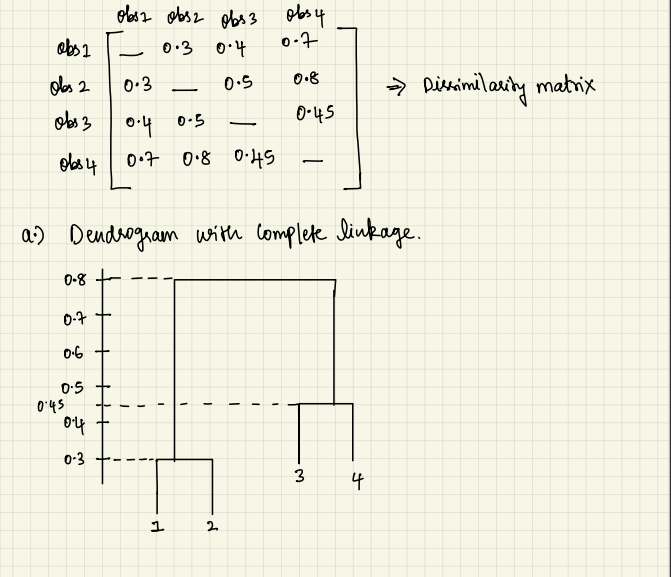

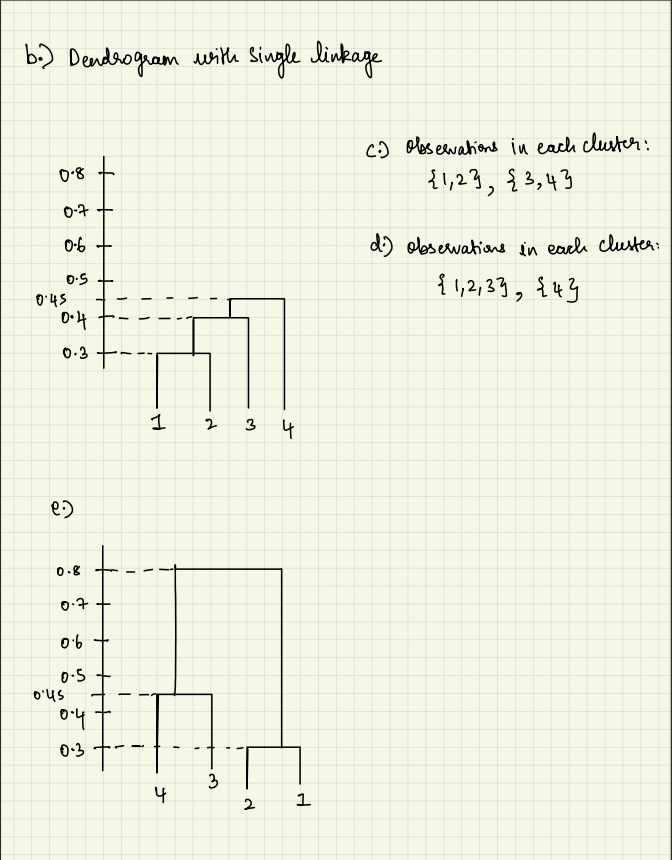